## CS/Stat 118 F21 Lecture 10 - Groups, Pivots, and Joins on Tables##

### Now, with Pandas!


In [ ]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## NBA Player Salaries

In [ ]:
nba = pd.read_csv('nba_20172018_salaries.csv')
nba.head()


In [ ]:
nba.shape

### What do those position abbreviations stand for?


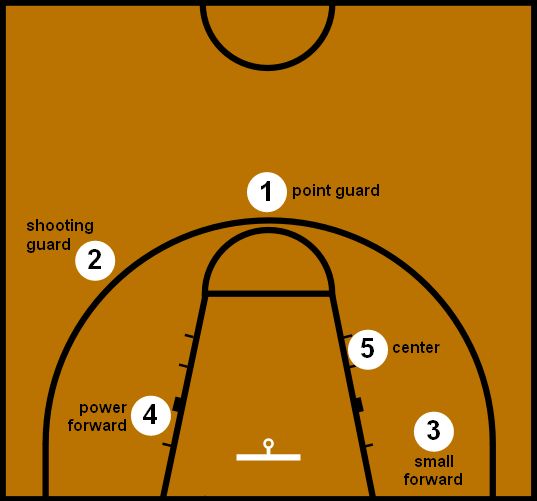

In [ ]:
position_name = pd.DataFrame(
    {'Position': ['C','PF','PG','SF','SG'], 
    'Position(Long)': ['Center','Power Forward','Point Guard','Small Forward','Shooting Guard']
    })
position_name

### Review - Apply: ###
Applies a function to each value of a column

In [ ]:
# A function to convert Dollars to Euros
def Euros(dollars):
    #USD to Euros Conversion Factor as of 10/28/20
    conversion_factor = 0.86
    ans = dollars*conversion_factor
    return(round(ans,1))

Euros(100)

In [ ]:
#what are all the salaries in Euro?
nba.Salary.apply(Euros)

In [ ]:
#let's apply that function and add the result to a table
nba["Euros (Mil)"] = nba.Salary.apply(Euros)
nba.head(10)

### Review - Group Operation: ###  
For computing "aggregate" statistics over rows

In [ ]:
#How many players on each team?
#note: using double square bracket to produce dataframe
#(otherwise it returns a series)
nba.groupby('Team').count()[['Player']]

In [ ]:
#How many players at each position?

nba.groupby('Position').count()[['Player']]

In [ ]:
#can also apply other functions to each group
nba.groupby('Position').Salary.mean()

In [ ]:
#which position makes the most (on average)?
nba.groupby('Position').Salary.mean().plot.bar()

In [ ]:
#can also apply other functions to each group
nba.groupby('Position').Salary.median().plot.bar()

### Grouping by multiple columns ###

In [ ]:
nba.groupby(['Team','Position']).count()[['Player']]

In [ ]:
#which teams are the most overloaded in which positions?
#nba.group(['Team','Position']).sort('count',descending=True)
nba.groupby(['Team','Position']).count()[['Player']]\
    .sort_values('Player',ascending=False).head(10)

In [ ]:
# Order Matters - Group by Major column first then Minor
nba.groupby(['Position','Team']).count()[['Player']]


### pivot_table Operation:###
Cross Classify: 

each unique value in "index" gets its own row 

each unique value in "columns" gets its own column 

value specifies the metric(s)

aggfunc says how to aggregate the metrics

In [ ]:
# Default aggregation function is np.mean
#pd.pivot_table(nba,index=['Team'],columns=['Position'],values=['Euros (Mil)'],aggfunc=np.size)
pd.pivot_table(nba,index=['Team'],columns=['Position'],values=['Euros (Mil)'])

In [ ]:
#what's going on with the LA Clippers?
nba.query("Team=='LA Clippers'").groupby('Position').count()[['Player']]

## Of course, order matters 

In [ ]:
# average salary paid by each team for each position
pd.pivot_table(nba,index=['Team'],columns=['Position'],values=['Salary'])

In [ ]:
#What if we wanted the average salary for each position for each team?
pd.pivot_table(nba,index=[...],columns=[...],values=['Salary'])

In [ ]:
# for each team,
# amount paid to "starter" (player earning the most) in each position?
pd.pivot_table(nba,index=['Team'],columns=['Position'],values=['Salary'],aggfunc=...)
 

In [ ]:
# add a column to the pivot table that sums up the starting salaries
starters = pd.pivot_table(nba,index=['Team'],columns=['Position'],values=['Salary'],aggfunc=np.max)
total = starters.apply(np.sum,axis=1)
starters['Total'] = total
starters

In [ ]:
#sort teams by Total starting salariers
starters.sort_values('Total',ascending=False)

### Join Operation: ###
Crucial for combining data from Multiple Data Sets

In [ ]:
#remember we created this "mapping" table:
position_name

<div>
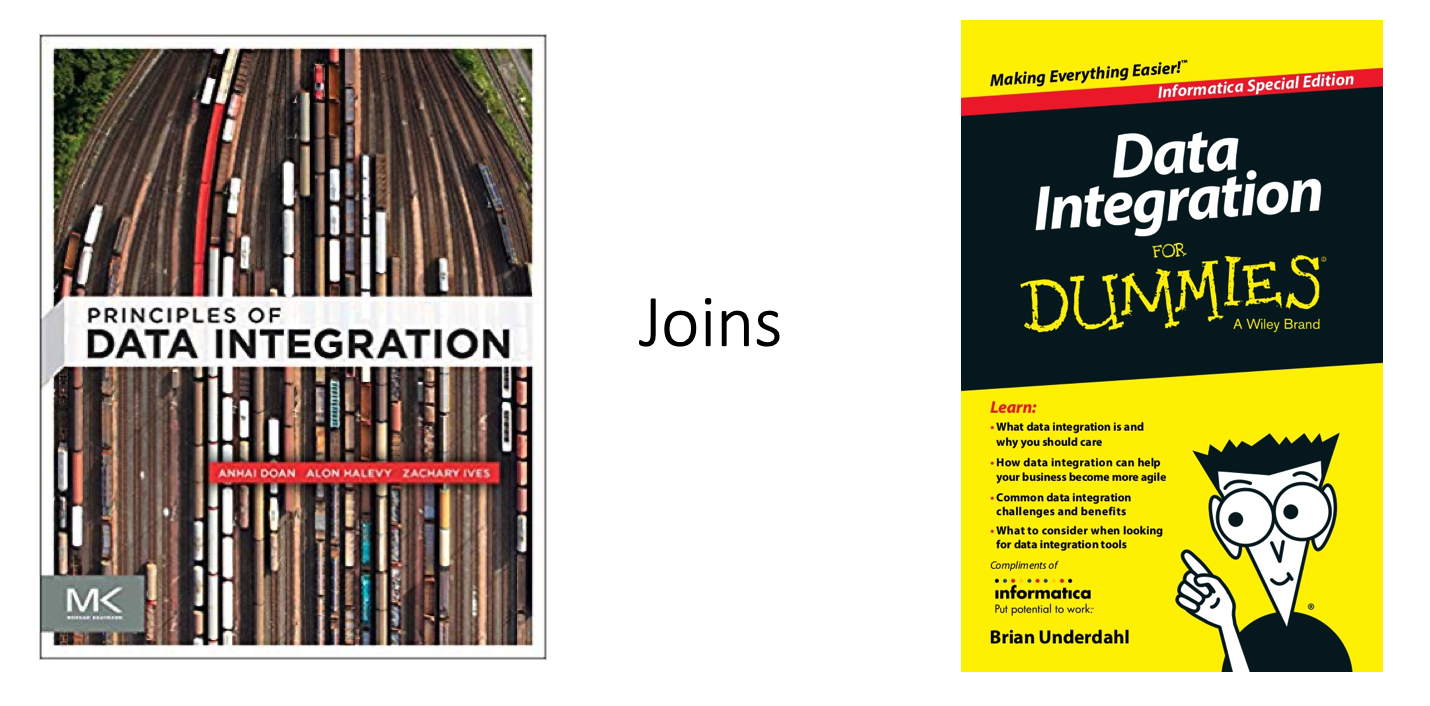
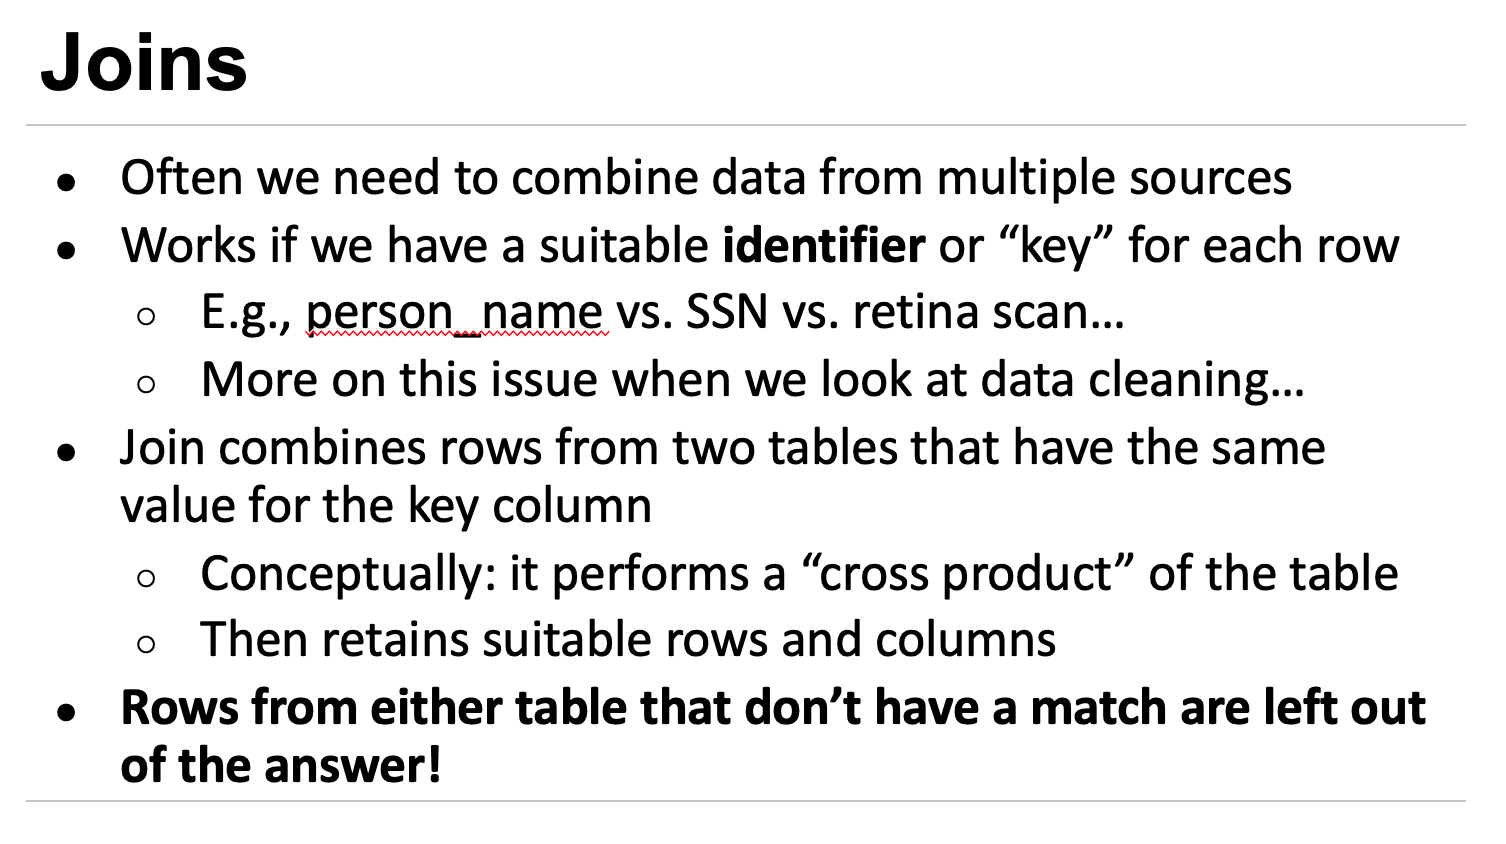
</div>
<br> 

### We can use the Pandas "merge()" function to do joins
#### The matching predicate is "equal to"

In [ ]:
#By default, the join condition is equality on columns with the same name
readable = pd.merge(nba,position_name)
readable.head()

In [ ]:
columns=['Player','Team','Position(Long)']
readable[columns].head()

In [ ]:
readable.pivot_table(index=['Team'], columns=['Position(Long)'],values=['Player'],aggfunc=np.size).head()

## Join Example

In [ ]:
drinks = pd.DataFrame({'Drink':['Milk Tea','Double Espresso','Espresso','Latte','Espresso'],\
                       'Cafe':['Tea One','Peaches','Peaches','Peaches',"Abe's"],\
                       'Price':[4,3,2,3,2]})
drinks

In [ ]:
discounts = pd.DataFrame({'Coupon % off': [25, 50, 5],'Location': ['Tea One', 'Peaches', "Tea One"]})
discounts

In [ ]:
#If the column names don't match, you can tell it how to join using "left_on" and "right_on"
menu = pd.merge(drinks,discounts, left_on='Cafe', right_on='Location')
menu

In [ ]:
#calculate the discounted prices for each drink at each location
discounted = menu.iloc[:,2] * (1 - menu.iloc[:,3]/100)
discounted

In [ ]:
#add the discounted price to the menu and get rid of the duplicate column
menu['Discounted Price'] = discounted
new_menu = menu.drop('Location',axis=1)
new_menu

In [ ]:
#Find the best price for each discounted drink
new_menu.groupby(['Drink'])['Discounted Price'].min()

### A word of caution - in the table above, we have no drinks from "Abe's" - this is because Abe's had no discounts and thus, no results in the join

### You can preserve all the cafes by using a "left outer" join
### If you don't specify, the default is "inner"

<div>
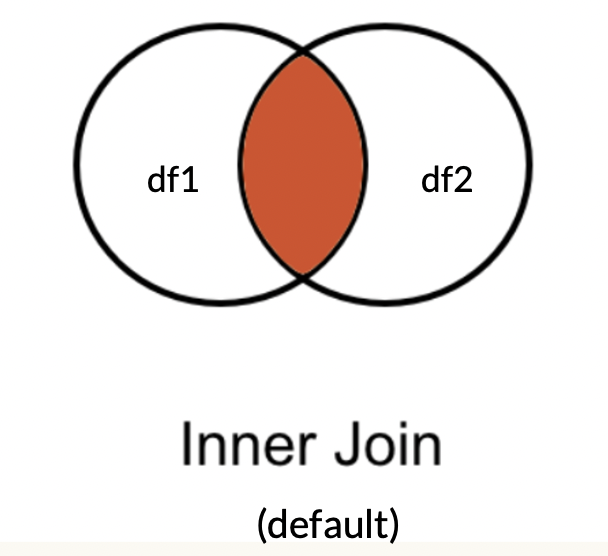
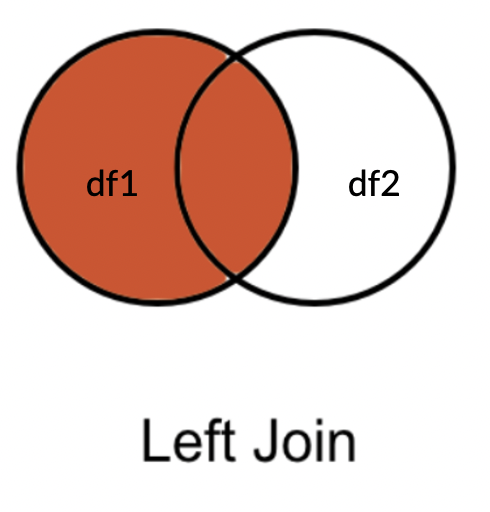
</div>
<br> 


In [ ]:
fulldrinks = pd.merge(drinks,discounts, left_on='Cafe', right_on='Location',how='left')
fulldrinks